## Applied Key Studies of ML and DL in Key Areas II - Topic 2

>**Conda Environment**   
conda create -n ACSML rdkit python=3.9  
conda activate ACSML    
pip install pandas numpy sklearn requests   
pip install rdkit seaborn mols2grid 


### 1.0 - RDKit

> The RDKit is a powerful Python library for working with chemical information. It can be used to generate descriptors, analyse chemical structures, visualize molecules and generate clusters. By combining this powerful tool with the simplicity of a Jupyter notebook, you can quickly explore your chemical data and gain insights into relationships between your molecules. The RDKit is free and open-source, and can be used in a variety of workflows.



In [48]:
#Import Libraries
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdDepictor
from rdkit.Chem import Draw #RDKit drawing
from rdkit import Chem #RDKit Chemistry

IPythonConsole.ipython_useSVG = True
IPythonConsole.molSize = 300, 300
rdDepictor.SetPreferCoordGen(True)

### 1.1 - How to displaying a chemical structure
Create a molecule (benzene) from a SMILES string and put the molecule into a variable called **mol**. 

In [49]:
mol = Chem.MolFromSmiles("c1ccccc1")

We can display the value of a variable in a Jupyter notebook by typing the variable name and clicking shift-return. 

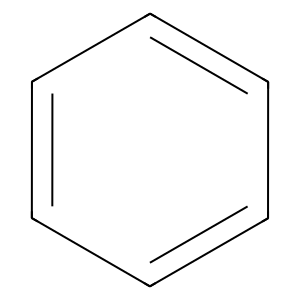

In [50]:
mol

The SMILES representations for most marketed drugs are available from the Wikipedia page for the corresponding drug.  For instance, we can get the SMILES for the Aspirin from [Wikipedia](https://en.wikipedia.org/wiki/Aspirin). With this SMILES string in hand, we can generate an RDKit molecule.

In [51]:
aspirin = Chem.MolFromSmiles("O=C(C)Oc1ccccc1C(=O)O")

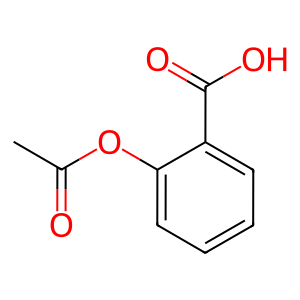

In [52]:
aspirin

### 1.2 Reading Multiple Chemical Structures
The RDKit also provides the ability to read molecules from common molecular structure formats.  In the code below we use the RDKit's [SDMolSupplier](https://www.rdkit.org/docs/cppapi/classRDKit_1_1SDMolSupplier.html) to read molecules from an [SD file](https://en.wikipedia.org/wiki/Chemical_table_file). First, we'll download the file from GitHub. 

Now we'll read the file. 

In [53]:
mols = [x for x in Chem.SDMolSupplier("data/example_compounds.sdf")]

The code above reads the molecules into a list.  When we display this, we see a list of molecule objects.  Below we'll take a look at a couple of ways to display multiple chemical structures in a grid. 

In [54]:
mols

### 1.3 Displaying Multiple Chemical Structures in a Grid
The RDKit's built-in [MolsToGridImage](https://www.rdkit.org/docs/source/rdkit.Chem.Draw.html) method provides a convenient way of displaying a grid of structures. 

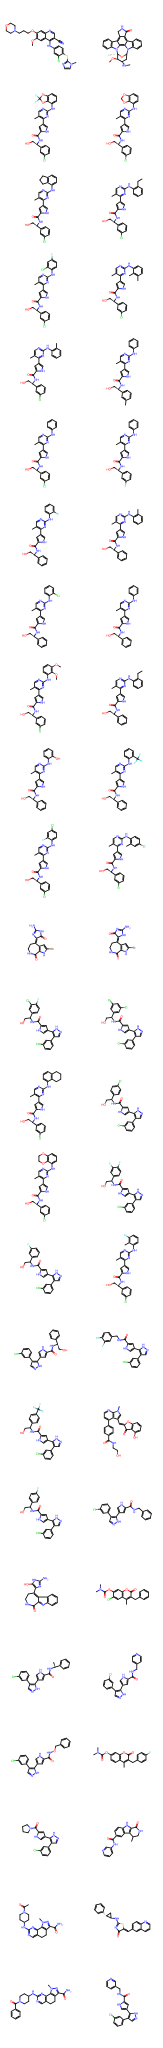

In [55]:
Draw.MolsToGridImage(mols,molsPerRow=2,useSVG=True)

We can also use the [mols2grid](https://github.com/cbouy/mols2grid) Python library to generate a more flexible grid view that also allows selections. 

In [56]:
import mols2grid #The mols2grid library provides a convenient way of displaying molecules in a grid

mols2grid.display(mols)

MolGridWidget()

If we select a few of the checkboxes in the grid above, we can programmatically get the selected cells. 

In [57]:
mols2grid.get_selection()

{}

### 1.4 Using the RDKit With Pandas Dataframes
We can also read an SD file into a [Pandas](https://pandas.pydata.org/) dataframe.  The Pandas dataframe holds data in a grid data structure that can be seen as similar to a spreadsheet. 

In [58]:
from rdkit.Chem import PandasTools #Add the ability to add a molecule to a dataframe
df = PandasTools.LoadSDF("data/example_compounds.sdf")

We can use mols2grid to display the dataframe.  Note that we need to specify the column that contains the RDKit molecule. When the RDKit reads an SD file, the molecule is placed in the ROMol column. 

In [59]:
mols2grid.display(df,mol_col="ROMol")

MolGridWidget()

### 1.5 Adding Properties to a Pandas Dataframe
Let's add column with molecular weight to the dataframe.

In [60]:
from rdkit.Chem.Descriptors import MolWt
from rdkit.Chem.Crippen import MolLogP
df['MW'] = [MolWt(x) for x in df.ROMol]

We can use mols2grid to display the dataframe with the newly added data. We can use the **subset** variable to indicate which dataframe columns to display.  Note that the structure image is specified by the **"img"** column. The **transform** variable can be used to specify the number of decimal places to display for the MW column. The **transform** variable accepts a dictionary of column names mapped to formatting functions.

In [61]:
two_decimals = lambda x: f"{x:.2f}"
mols2grid.display(df,mol_col="ROMol",subset=["img","MW"],transform={"MW" : two_decimals})

MolGridWidget()

### 1.6 Plotting Property Data

It's easy to access the data in the dataframe and use it to perform calculations and generate plots. For instance, we can use a boxplot to examine the distribution of molecular weight within the dataframe.

In [62]:
import seaborn as sns

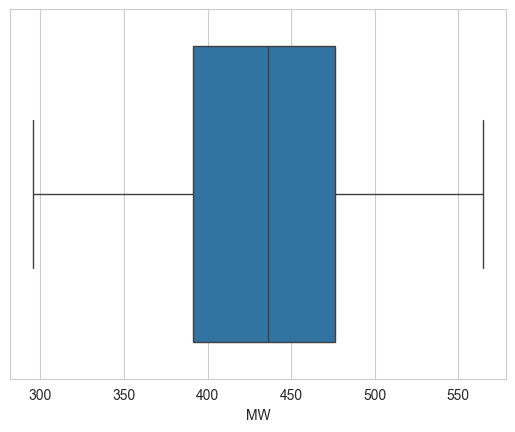

In [63]:
ax = sns.boxplot(x=df.MW)

### 1.7 Exercise: 
Plot the Molecular Weight of the natural compounds coming from food reported in the file SweetBitter.csv

In [64]:
import pandas as pd
from rdkit.Chem.Descriptors import MolWt

df=pd.read_csv("data/SweetBitter.csv", sep=';')

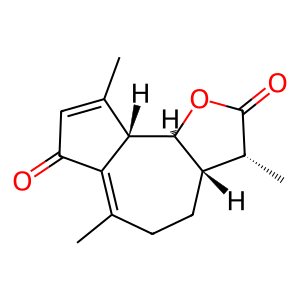

In [65]:
Chem.MolFromSmiles(df['SMILES'][0])